<span style="color:lightblue"> 

# Tasks  
***
Applied Statistics module with lecturer Dr Ian McLoughlin

Semester 4, Higher Diploma in Science in Data Analytics at ATU 2023/24 


Submission due date: 20/12/2023
 
Author: Shane Keenan 
Status: Ongoing
***
</span>

Import all required python packages needed 

In [247]:
# numerical package for arrays and matrices
import numpy as np 
# package for data manipulation and analysis
import pandas as pd 

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools
import math

# plotting library
import matplotlib.pyplot as plt 
import seaborn as sns
# statistical graphics package
import scipy.stats as stat
from scipy.stats import norm
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson


import random 
from PIL import Image
import os


# displayed plot quality improvement 
%matplotlib inline
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')  # For Retina displays or high-res screens

C:\Users\shane\AppData\Local\Temp\ipykernel_19416\4135815694.py:31: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')  # For Retina displays or high-res screens


<span style="color:lightblue"> 

### Task 1: Permutations and Combinations
***


Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.
</span>


***




### Number of unique combinations 

Use `math.comb()` function which calculated the function: 

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.

where **n** is the total number of cups of tea and **k** is number of cups of tea with milk in first. 

This returns the number of ways to choose **k** items from **n** items without repetition and without order.



Total number of combinations of selecting 6 cups from 12:

$\binom{12}{6} = \frac{12!}{6!(12-6)!} = \frac{12!}{6!6!}$


### define parameters 

In [248]:
# the total number of cups of tea - n 
n = 12
# the number of cups of tea with milk in first - k 
k = 6

In [249]:
# Number of ways of selecting six cups from twelve.
total_combs = math.comb(n, k)
total_combs

924

This equates to 924 combinations.

#### Sanity check - calculate directly using math.factorial() 

In [250]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

Probability of selecting the correct 6 cups:

𝑃(no errors) = 1/924  = 0.001082 (apprximately = 0.108 %) 


In [251]:
# The probability that she (randomly) selects the six correct cups.
P_no_error = 1 / total_combs
P_no_error

0.0010822510822510823

"Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error."



### 1 Error allowed 

The probability of making 1 error - that is correctly selecting 5 correct cups of tea with milk in first out of the 6 cups available times incorrectly selecting 1 cup of tea without milk in first out of the 6 available.  

In [252]:
# selecting 5 correct cups from the 6 correct (mil in first) and 1 incorrect from the 6 incorrect (milk in second)
ways_1_error = math.comb(6, 5) * math.comb(6, 1)
ways_1_error

36

So the probability of selecting exactly 5 cups correctly is given by 

In [253]:
P_1_error_exactly = ways_1_error / total_combs
P_1_error_exactly

0.03896103896103896

However we are asked to calculate the probability of selecting **_at least_** 5 cups correcly 

this includes the no error scenario as well. 

In [254]:
P_1_error = P_no_error + P_1_error_exactly
P_1_error

0.04004329004329004

Probability of making at least 1 error (0 or 1 errors):


P(1 error) = 0.04004 (approximately 4.00%)

This is the combined probability of selecting all 6 cups correctly (0 errors) or selecting 5 correct and 1 incorrect (1 error).


So.. Yes, I think it reasonable to accept 1 error as the probability is still small at 4%.





--

"Would you accept two errors? Explain."

--
### 2 errors allowed 

The probability of making at least 2 errors - that is correctly selecting 4 correct cups of tea with milk in first out of the 6 cups available times incorrectly selecting 2 cups of tea without milk in first out of the 6 available.  


In [255]:
# selecting 4 correct cups from the 6 correct (milk in first) and 2 incorrect from the 6 incorrect (milk in second)
ways_2_errors = math.comb(6, 4) * math.comb(6, 2)
ways_2_errors

225

So the probablility of making exactly 2 errors (selecting 4 correctly) is 

P(2_errors) = 0.24351 (approximately 24.3 %)

In [256]:
p_2_errors_exact = ways_2_errors / total_combs
p_2_errors_exact

0.2435064935064935

with a probability of least 2 errors (selecting 4 correctly) being 

P(2_errors) = 0.28355 (approximately 28.4 %)

In [257]:
p_2_errors = p_2_errors_exact + P_1_error_exactly + P_no_error;
p_2_errors

0.28354978354978355

Should we allow two errors? 

No, the probability of making at least two errors is much higher around 28.4%, which is significantly larger than the probability for one error (at around 4 %). 

Allowing two errors would make it too likely for the person to guess correctly purely by random chance, so the bar would be set too low. 

In my optinion, a minimum of 1 error is all we can accept. 

### Histogram of probability distriubtion 

This section is a repeat of the lecture notes but updated for n = 12 and k = 6 and shows the new probability distribution for this scenario. 

In [258]:
# The cup labels.
labels = list(range(n))
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [259]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, k))
combs[0] # select 1st in the list for example 

(0, 1, 2, 3, 4, 5)

In [260]:
# Number of combinations.
len(combs)

924

In [261]:
# Select six cups at random to put milk in first.
labels_milk = random.sample(labels, 6)
# Sort, inplace.
labels_milk.sort()
labels_milk

[1, 2, 4, 7, 8, 10]

In [262]:
# Turn labels_milk into a set.
set(labels_milk)

{1, 2, 4, 7, 8, 10}

In [263]:
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {1, 2, 4} 3
(0, 1, 2, 3, 4, 6) {1, 2, 4} 3
(0, 1, 2, 3, 4, 7) {1, 2, 4, 7} 4
(0, 1, 2, 3, 4, 8) {8, 1, 2, 4} 4
(0, 1, 2, 3, 4, 9) {1, 2, 4} 3
(0, 1, 2, 3, 4, 10) {1, 2, 10, 4} 4
(0, 1, 2, 3, 4, 11) {1, 2, 4} 3
(0, 1, 2, 3, 5, 6) {1, 2} 2
(0, 1, 2, 3, 5, 7) {1, 2, 7} 3
(0, 1, 2, 3, 5, 8) {8, 1, 2} 3
(0, 1, 2, 3, 5, 9) {1, 2} 2
(0, 1, 2, 3, 5, 10) {1, 2, 10} 3
(0, 1, 2, 3, 5, 11) {1, 2} 2
(0, 1, 2, 3, 6, 7) {1, 2, 7} 3
(0, 1, 2, 3, 6, 8) {8, 1, 2} 3
(0, 1, 2, 3, 6, 9) {1, 2} 2
(0, 1, 2, 3, 6, 10) {1, 2, 10} 3
(0, 1, 2, 3, 6, 11) {1, 2} 2
(0, 1, 2, 3, 7, 8) {8, 1, 2, 7} 4
(0, 1, 2, 3, 7, 9) {1, 2, 7} 3
(0, 1, 2, 3, 7, 10) {1, 2, 10, 7} 4
(0, 1, 2, 3, 7, 11) {1, 2, 7} 3
(0, 1, 2, 3, 8, 9) {8, 1, 2} 3
(0, 1, 2, 3, 8, 10) {8, 1, 2, 10} 4
(0, 1, 2, 3, 8, 11) {8, 1, 2} 3
(0, 1, 2, 3, 9, 10) {1, 2, 10} 3
(0, 1, 2, 3, 9, 11) {1, 2} 2
(0, 1, 2, 3, 10, 11) {1, 2, 10} 3
(0, 1, 2, 4, 5, 6) {1, 2, 4} 3
(0, 1, 2, 4, 5, 7) {1, 2, 4, 7} 4
(0, 1, 2, 4, 5, 8) {8, 1, 2, 4} 4
(0, 1, 2, 4,

In [264]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)
counts[1]

array([  1,  36, 225, 400, 225,  36,   1], dtype=int64)

Plot the Probability Distribution of Correctly selected tea cups in Tea Tasting Experiment

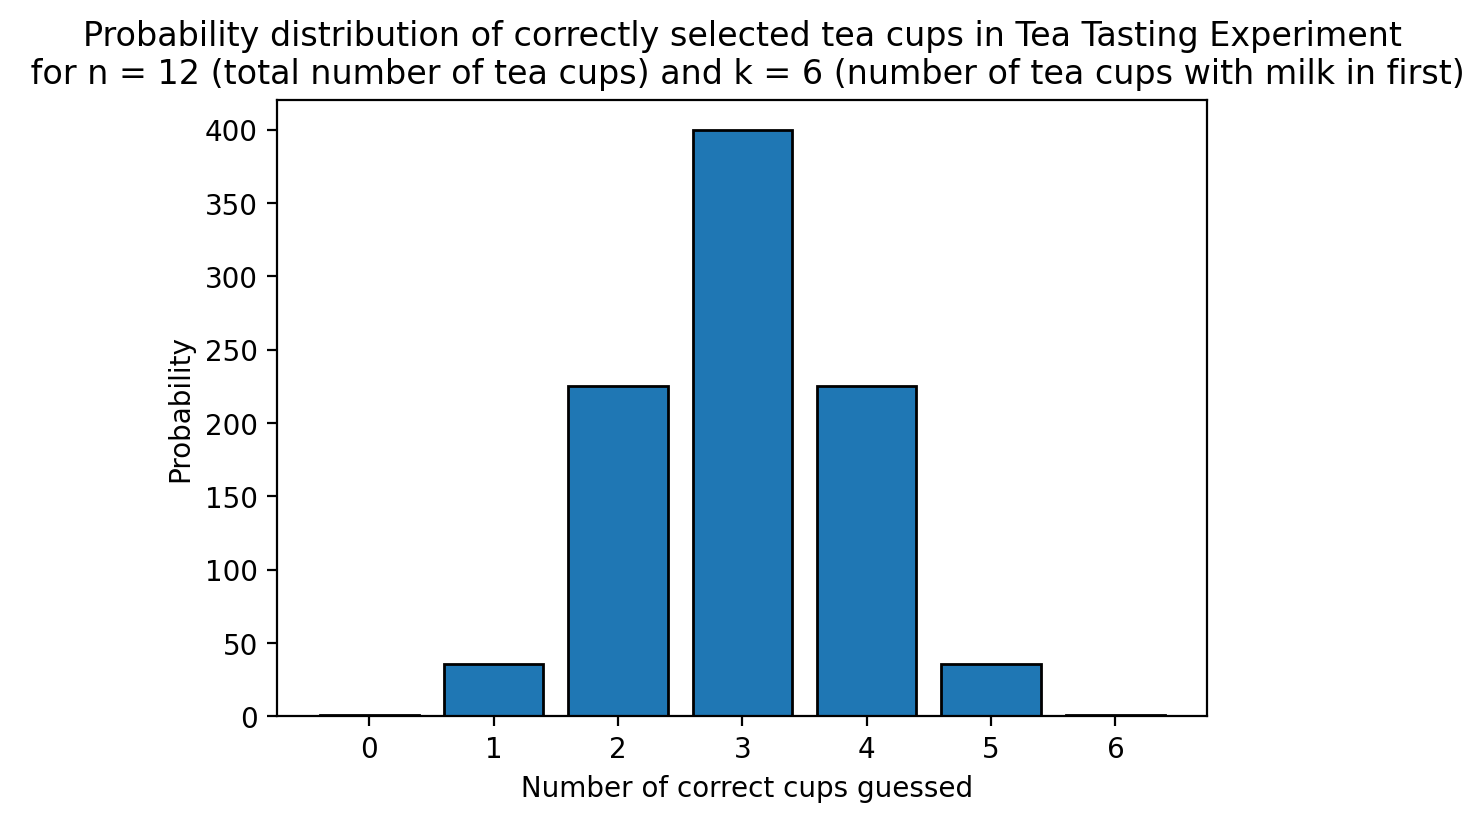

In [265]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))
# plot the bar chart.
ax.bar(counts[0], counts[1],edgecolor='black');
ax.set_title("Probability distribution of correctly selected tea cups in Tea Tasting Experiment\n for n = 12 (total number of tea cups) and k = 6 (number of tea cups with milk in first)")
ax.set_ylabel("Probability")
ax.set_xlabel(" Number of correct cups guessed")
plt.show()

<span style="color:green">  

***
End of Task   1  
***

</span>

<span style="color:lightblue">  


### Task 2:  numpy's Normal Distribution


***
In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

***
</span>

Generate normal distributions 


generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0` using ``numpy.random.normal()`` function

https://docs.scipy.org/doc/scipy/reference/stats.html


In [266]:
mean = 10.0 # set mean 
std = 3.0  # set standard deviation 

# generate 100,000 x values from 0 to 20 
x_values = np.linspace(0, 20, 100000)
# using numpy.random.normal function generate normal distribution 
y_values_norm = np.random.normal(mean, std, 100000)
# scipy.stats part of the SciPy library does a nice job of generating the probability density function for us. 
y_values_pdf = norm.pdf(x_values, mean, std)

Plot the histogram

Bin selection 

There are quite a number of different methods to choose from here. I  

[1] https://www.statisticshowto.com/choose-bin-sizes-statistics/

[2] https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width

[3] https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram

Number of bins chosen: 150


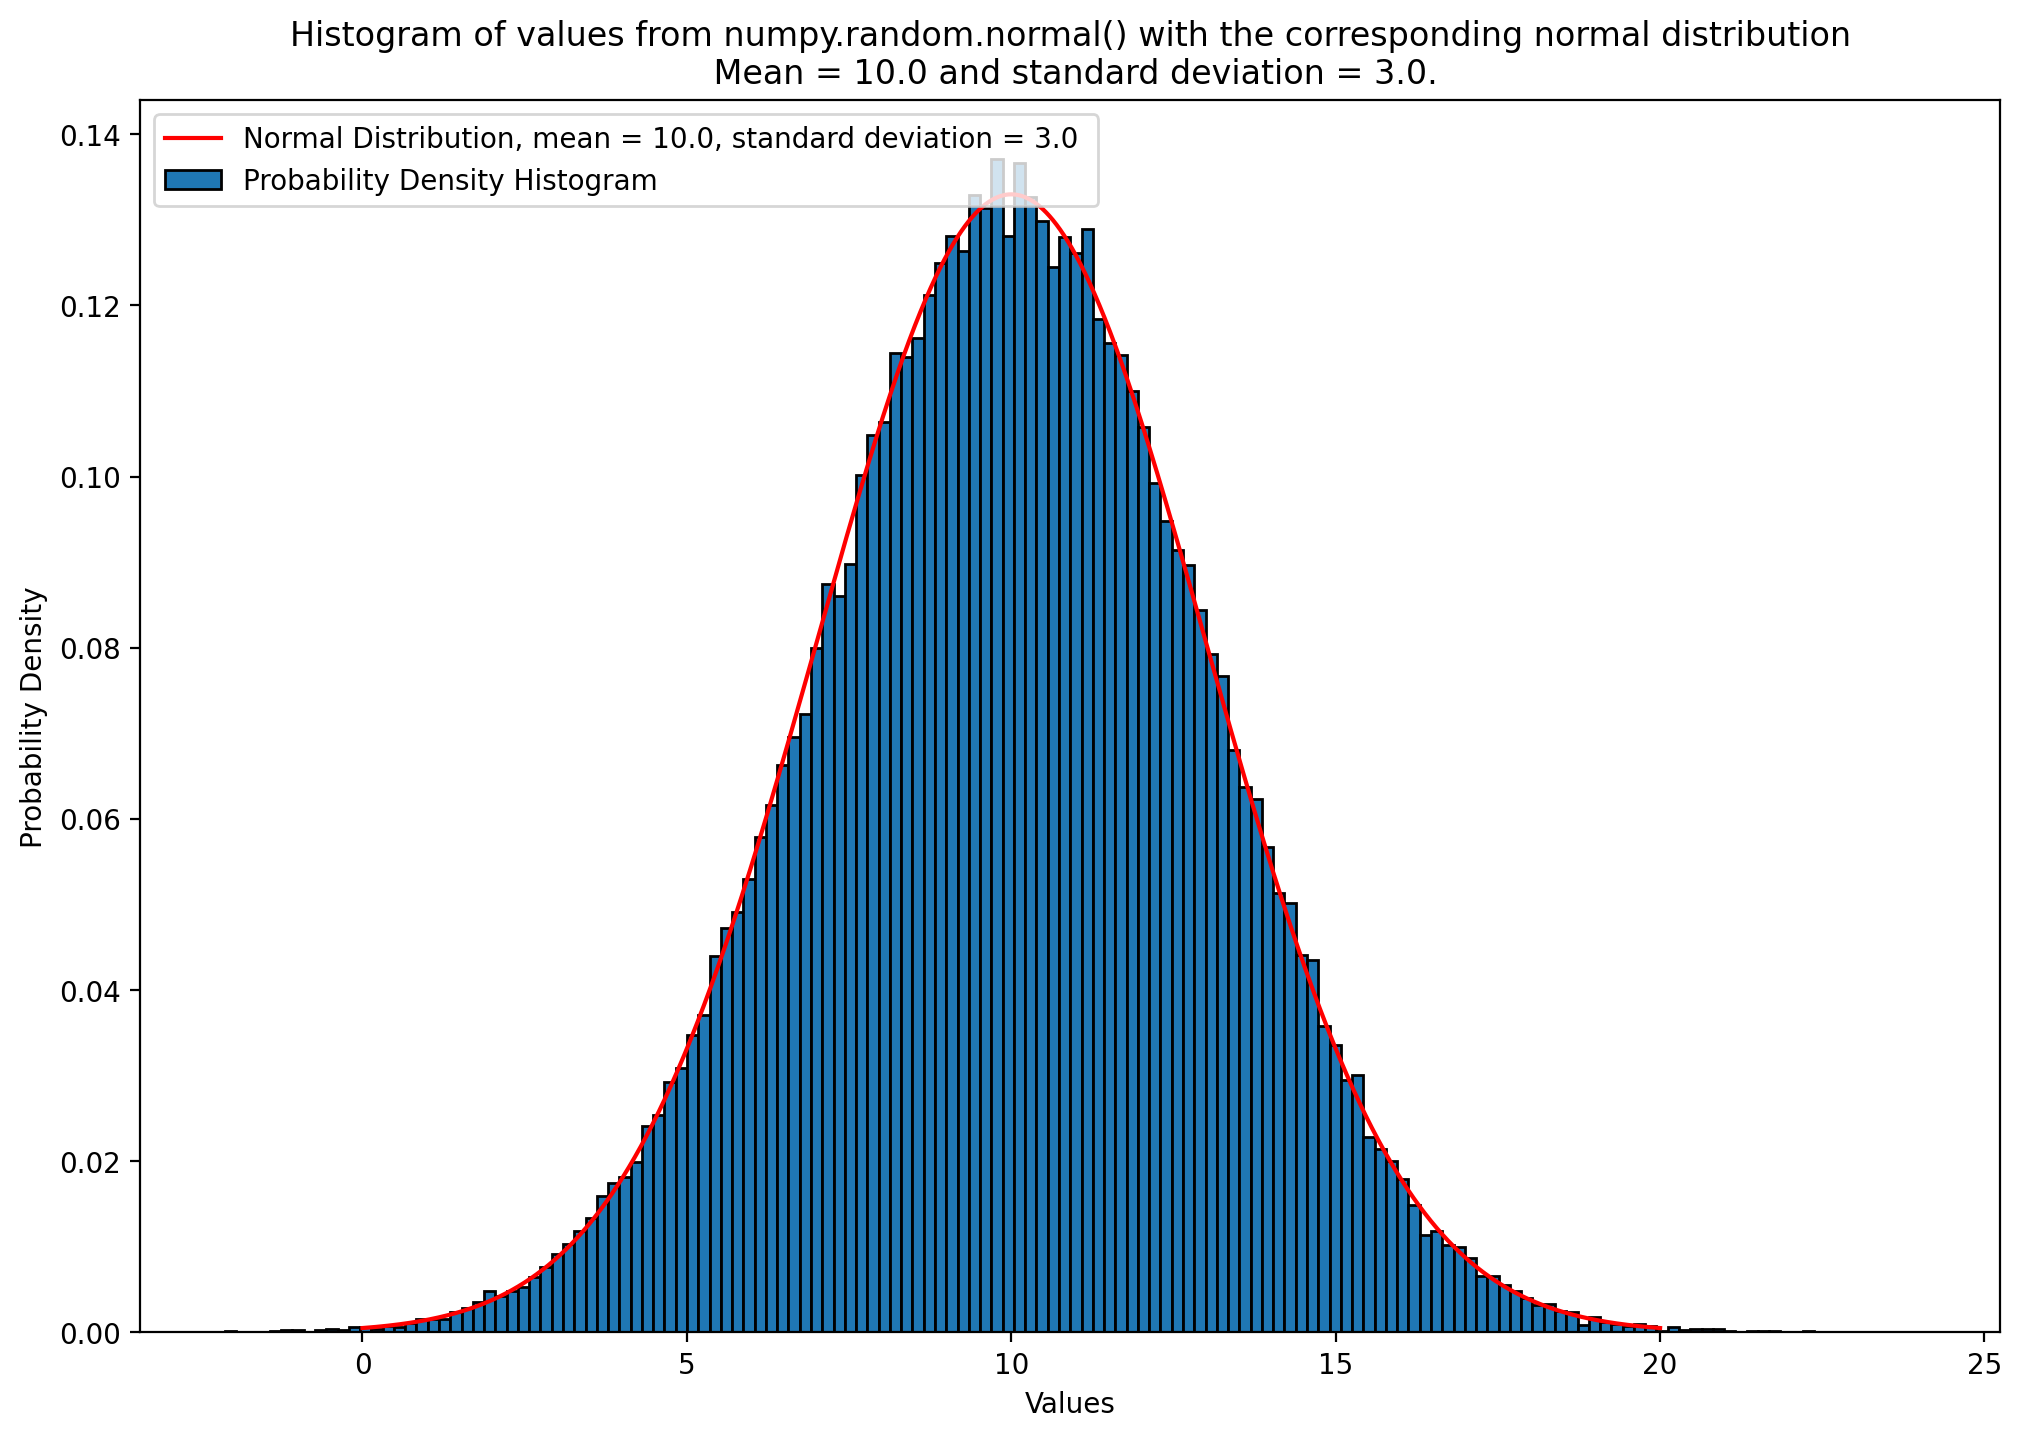

In [267]:
# define the number of bins or range. 
bins = 'auto'

fig, ax = plt.subplots(figsize=(12, 8))
# plot the normal distribution probability density function in red
ax.plot(x_values, y_values_pdf, 'r', label=f'Normal Distribution, mean = {mean}, standard deviation = {std} ')
# plot the histogram in blue 
counts, bin_edges,x = ax.hist(y_values_norm, bins = bins, density=True, label='Probability Density Histogram', edgecolor='black')
num_bins = len(bin_edges) - 1 # extract out the number of bins automatically selected out of curiosity
print(f"Number of bins chosen: {num_bins}")

ax.set_title('Histogram of values from numpy.random.normal() with the corresponding normal distribution\n Mean = 10.0 and standard deviation = 3.0.')
ax.set_xlabel('Values')
ax.set_ylabel('Probability Density')
ax.legend(loc='upper left')
plt.show()

### The Shapiro-Wilk test

We can use the Shapiro-Wilk test to examine whether our `numpy.random.normal()` variable is normally distributed. 

The null hypothesis for the Shapiro-Wilk test is that
<div style="text-align: center; font-weight: bold;">
   a variable is normally distributed in some population.
</div>


A different way to say the same is that a variable’s values are a simple random sample from a normal distribution. As a rule of thumb, we

<div style="text-align: center; font-weight: bold;">
reject the null hypothesis if p < 0.05.
</div>
[1]

If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution. 


[1] https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/
[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro



In [268]:
shapiro_test = stat.shapiro(y_values_norm)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
if shapiro_test.pvalue < 0.05:
    print("The data does not follow a normal distribution (reject null hypothesis H0).")
else:
    print("The data follows a normal distribution (fail to reject null hypothesis H0).")

Shapiro-Wilk Test Statistic: 0.999979638348571
p-value: 0.9083371708573776
The data follows a normal distribution (fail to reject null hypothesis H0).


c:\Users\shane\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


computing a statistic based on the relationship between the observations and the expected order statistics of a normal distribution.The value of this statistic tends to be high (close to 1) for samples drawn from a normal distribution. In our case Statistic is effectively = 1 (0.9999705)

The comparison is quantified by the p-value: the proportion of values in the null distribution less than or equal to the observed value of the statistic. [2]

*** 
Scipy Stats also suggested an addiitonal normality test - Anderson-Darling test for data coming from a particular distribution.

The Anderson-Darling test tests the null hypothesis th
at a sample is drawn from a population that follows a particular distribution. This defaults to Normal but can be selected. ``dist='norm'``

[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson

In [269]:
anderson_test = stat.anderson(y_values_norm, dist='norm') # define distribtion as norm 
print("Anderson-Darling Test Statistic:", anderson_test.statistic)
print("Anderson-Darling Test critical values:", anderson_test.critical_values)
print("corresponding to the follwoing significance levels",anderson_test.significance_level)
print(anderson_test.fit_result) 

Anderson-Darling Test Statistic: 0.34907587300403975
Anderson-Darling Test critical values: [0.576 0.656 0.787 0.918 1.092]
corresponding to the follwoing significance levels [15.  10.   5.   2.5  1. ]
  params: FitParams(loc=10.005543114362197, scale=3.0064121599263767)
 success: True
 message: '`anderson` successfully fit the distribution to the data.'


we can see that the Anderson-Darling Statistic of 0.56143 < of critical values for significance levels 15%, 10%, 5%, 2.5%, and 1%. 

 where the significacne level is a threshold used in hypothesis testing to decide whether to reject the null hypothesis.

 Looking at the ``fit_results`` we can see the ``FitParams(loc=10.010642780438808, scale=2.9932761090776077)`` are within 1 % of our mean of 10 and standard deviation of 3. 

the QQ plot or Quartile-Quartile plot can also give a nice visual indication of how well the data fits a normal distribution 

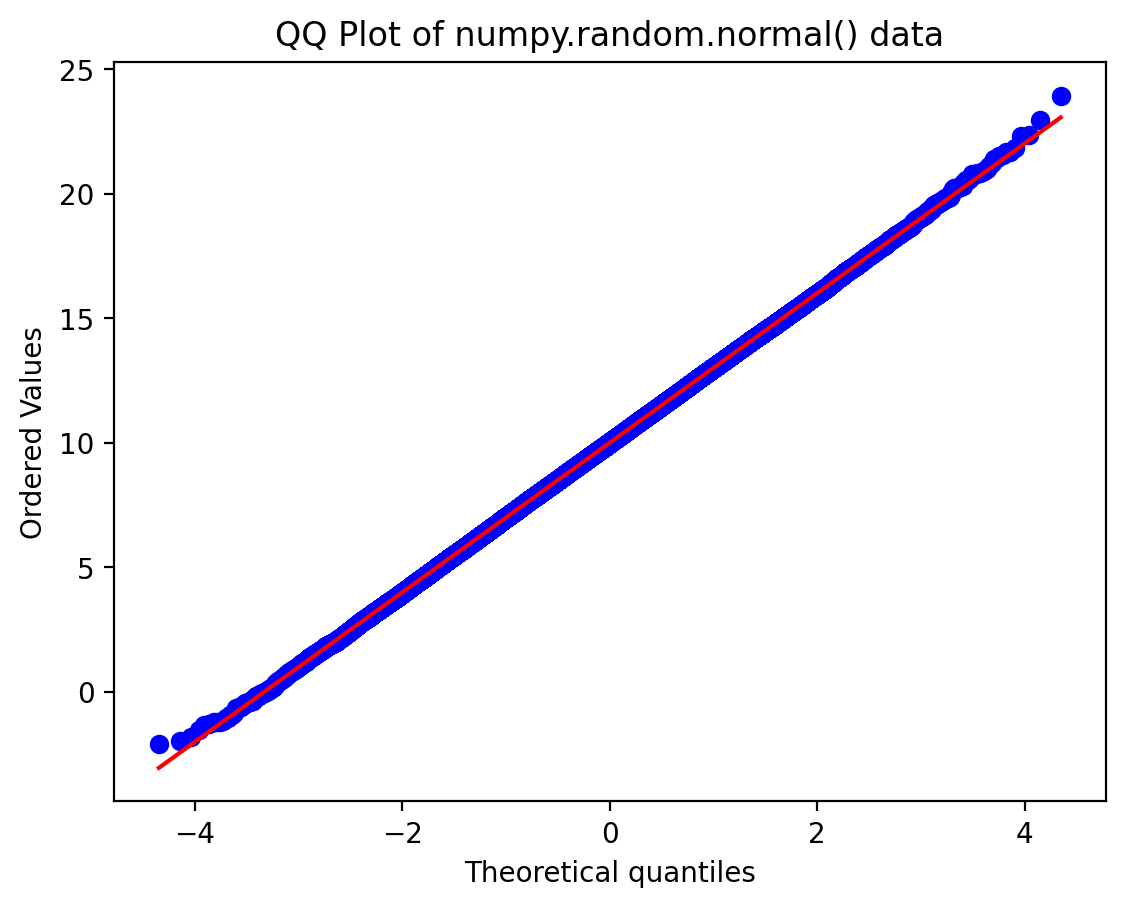

In [270]:
# Create an empty plot.
fig, ax = plt.subplots()

# Create a q-q plot.
stat.probplot(y_values_norm, dist='norm', plot=ax)
plt.title("QQ Plot of numpy.random.normal() data")

# Show the QQ plot
plt.show()

When points shown in blue lie closer to the straight diagonal red line in a Q-Q plot the more normally distributed the data.


To conclude, we can say with a high degree of certainty that the numpy.random.normal() generated data follows a normal distribution. We have used statistical tests - The Shapiro-Wilk and Anderson-Darling tests and visualisations - histogram plot of data and the corresponding normal distribution probability density function and the QQ plot to confirm the normaility of the distribution. 

<span style="color:green">  

***

End of Task 2

***

</span>

<span style="color:lightblue">  

### Task 3: t-Test Calculation
***


Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

Calculate the t-statistic based on this data set, using Python.
Compare it to the value given by `scipy.stats`.
Explain your work and list any sources used.

</span>

***

Import the dataset - data from the above table was saved to heart_rates.csv file in the data folder. Data is imported using relative paths so can be run with ease. 


In [271]:
#get the current working directory 
current_directory = os.getcwd()
# relative path from the notebook to the Excel file in the data folder
relative_path_data = "data\\heart_rates.csv"
# Join the two paths
file_path_data = os.path.join(current_directory, relative_path_data)
data = pd.read_csv(file_path_data) # import the .CSV file as panda dataframe 
data # show the dataframe

,Patient ID,Before,After
0,0,63,64
1,1,68,64
2,2,70,68
3,3,64,64
4,4,74,73
5,5,67,70
6,6,70,72
7,7,57,54
8,8,66,61
9,9,65,63


Rename data

- Group A - "Before" 
- Group B - "After"

In [272]:
group_a = data["Before"]
group_b = data["After"]

## Visualise the data using histogram, boxplots, Strip plot.

Plot the histogram for each group individually on the same figure. set the xlim the same for each. Label indicates the bin width for each. 

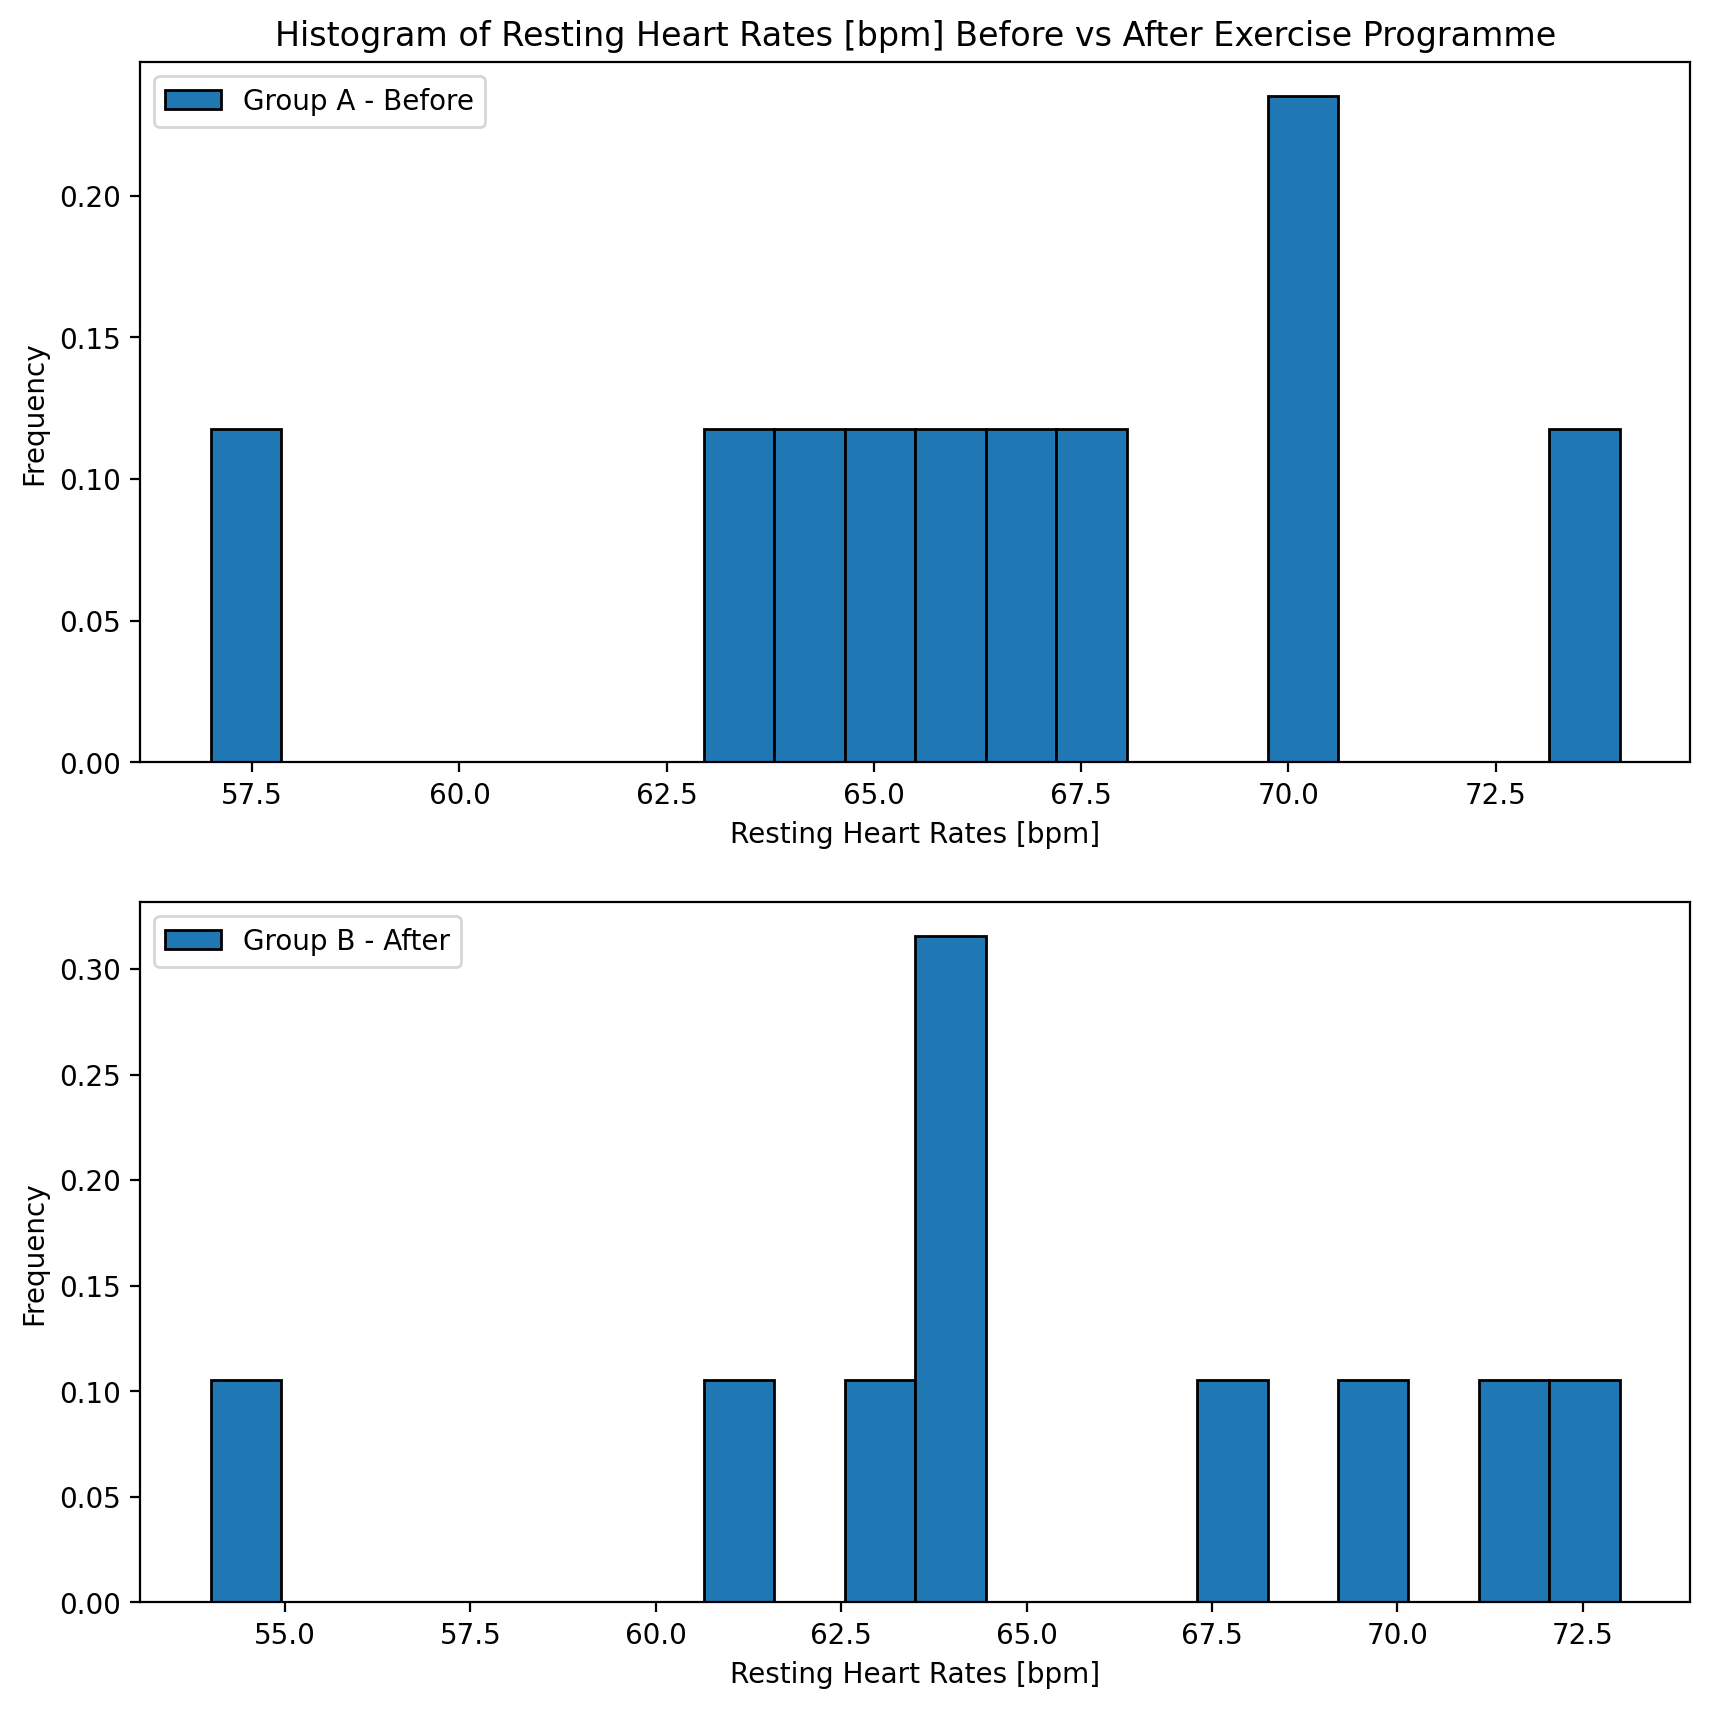

In [282]:
bins=20
fig, ax = plt.subplots(2,1, figsize=(10, 10))
ax[0].hist(group_a, bins=bins, density=True, label=f'Group A - Before', edgecolor='black')
ax[0].set_title('Histogram of Resting Heart Rates [bpm] Before vs After Exercise Programme')
ax[0].set_xlabel('Resting Heart Rates [bpm]')
ax[0].set_ylabel('Frequency')
#ax[0].set_xlim(3, 6.5)
ax[0].legend(loc='upper left')
ax[1].hist(group_b, bins=bins, density=True, label=f'Group B - After', edgecolor='black')
ax[1].set_title('')
ax[1].set_xlabel('Resting Heart Rates [bpm]')
ax[1].set_ylabel('Frequency')
#ax[1].set_xlim(3, 6.5)
ax[1].legend(loc='upper left')

plt.show()

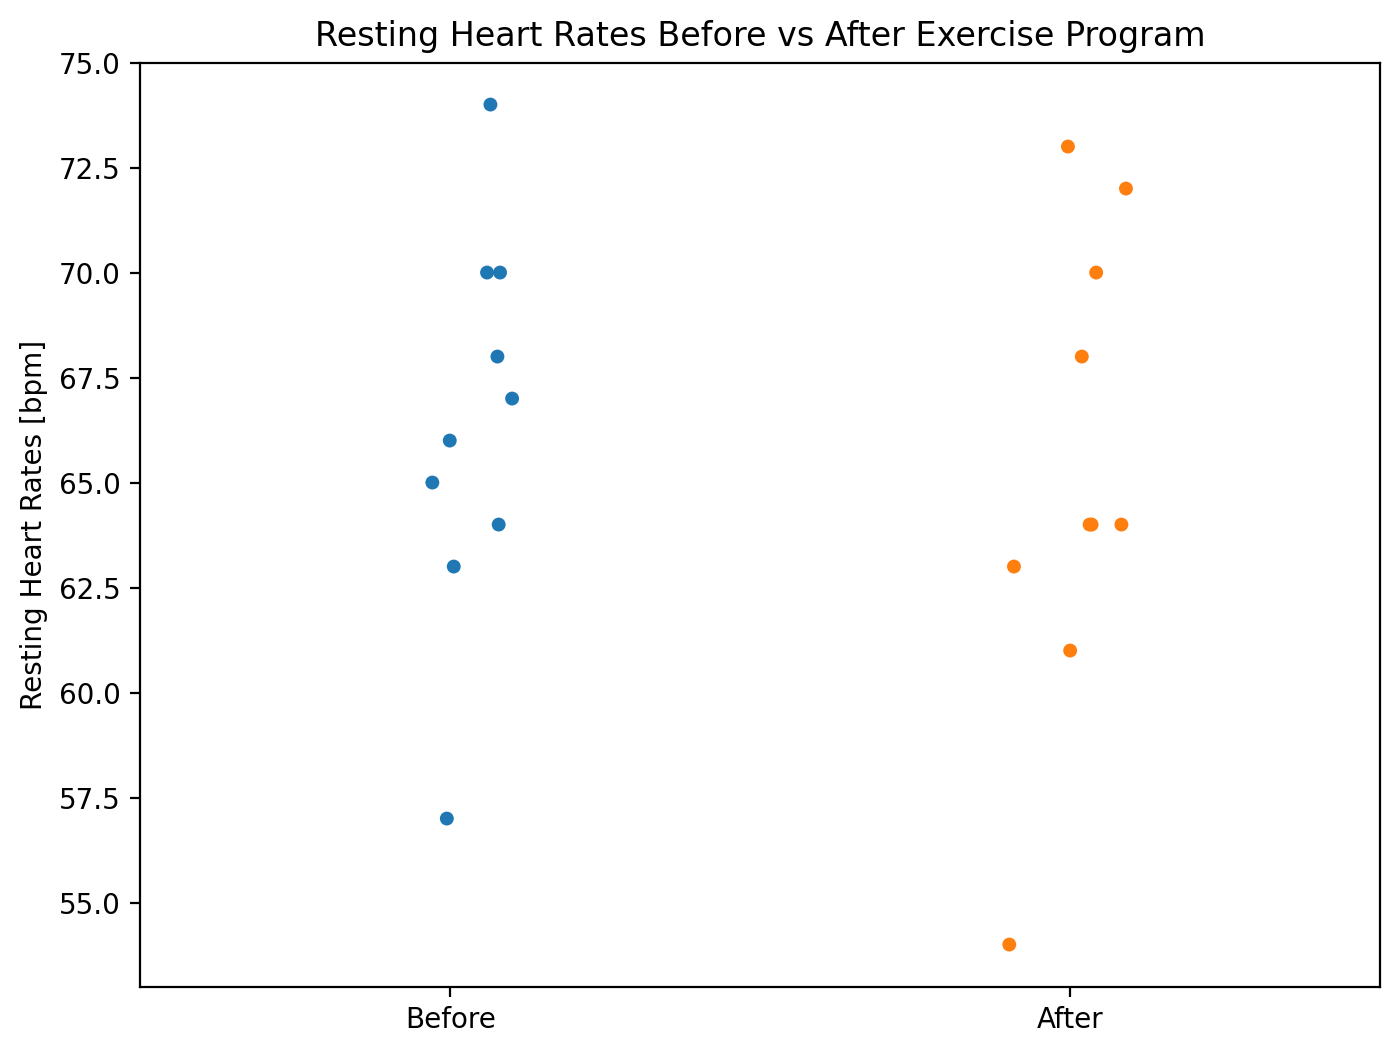

In [283]:
# Strip plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=[group_a, group_b])
plt.title("Resting Heart Rates Before vs After Exercise Program")
plt.ylabel("Resting Heart Rates [bpm]")
plt.show()

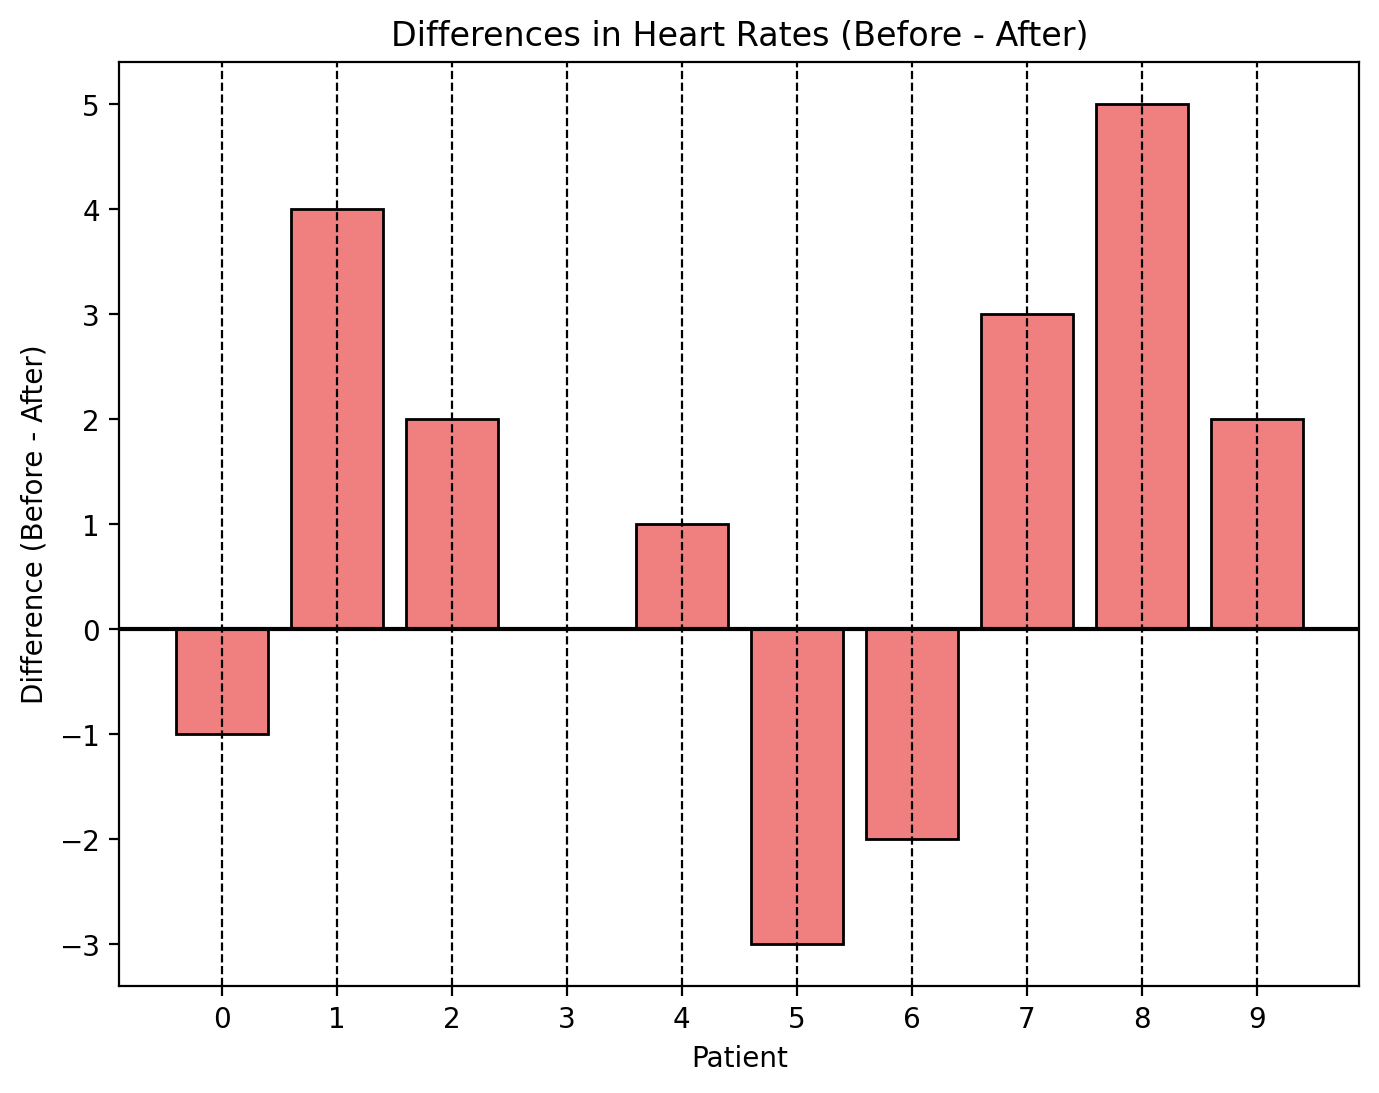

In [ ]:
# Bar plot: Differences (Before - After)
diff = group_a - group_b
patients = [f"{i}" for i in range(len(data))]
plt.figure(figsize=(8, 6))
plt.bar(patients, diff, color="lightcoral",edgecolor='black')
plt.axhline(0, color="black")
plt.title("Differences in Heart Rates (Before - After)")
plt.xlabel("Patient")
plt.ylabel("Difference (Before - After)")
plt.grid(axis='x',linestyle="--",color="black")
plt.show()

## Type of t-test 

First question we should ask, is whether this data suitable for a t-test? 

Here we test the data against the four assumptions outlined on the [SPSS tutorial page](https://statistics.laerd.com/spss-tutorials/dependent-t-tests-using-spss-statistics.php)

Access to this page is restricted so I show screenshots from the lectures below 

<img src="img\laerd_t-test_assumptions1.png" alt="xkcd" width="500"/>
<img src="img\laerd_t-test_assumptions2.png" alt="xkcd" width="500"/>


- Assumption #1 - <span style="color:green">Satisfied.</span>  - dependent variable on continuous scale - 




- Assumption #2 - <span style="color:green">Satisfied.</span>  Related groups - Each patient's resting heart rate is measured "before" and "after" the exercise program. These two measurements are clearly paired to the same person. 




- Assumption #3 - <span style="color:green">Satisfied.</span>  no significant outliers 



- Assumption #4 -  <span style="color:green">Satisfied.</span>  the distribution of the differences in the dependent variable - shapiro- wlk test of normality 








We can use the Shapiro-Wilk statistical test to examine whether the data is normally distributed. A test statistic close to one indicates that the data is likely to be normally distributed. 
The p-value threshold is 0.05 therefore if the p-value is greater than this threshold the null hypothesis is accepted.


In [277]:
shapiro_test = stat.shapiro(data["Before"])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
if shapiro_test.pvalue > 0.05:
   print('The "Before" data follows a normal distribution (fail to reject null hypothesis H0).')
else:
    print('The "Before" data does not follow a normal distribution (reject null hypothesis H0).')


Shapiro-Wilk Test Statistic: 0.9726137534909091
p-value: 0.9139645311517168
The "Before" data follows a normal distribution (fail to reject null hypothesis H0).


In [278]:
shapiro_test = stat.shapiro(data["After"])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
if shapiro_test.pvalue > 0.05:
   print('The "After"" data follows a normal distribution (fail to reject null hypothesis H0).')
else:
    print('The "After" data does not follow a normal distribution (reject null hypothesis H0).')

Shapiro-Wilk Test Statistic: 0.9397047620636736
p-value: 0.5497328687429658
The "After"" data follows a normal distribution (fail to reject null hypothesis H0).


For both the before and after results the test statistic is close to one and the p-value is greater than 0.05 and therefore there is no evidence to reject the null hypothesis that the data is normally distributed. 

This meets the t-Test requirement for the data to be normally distributed

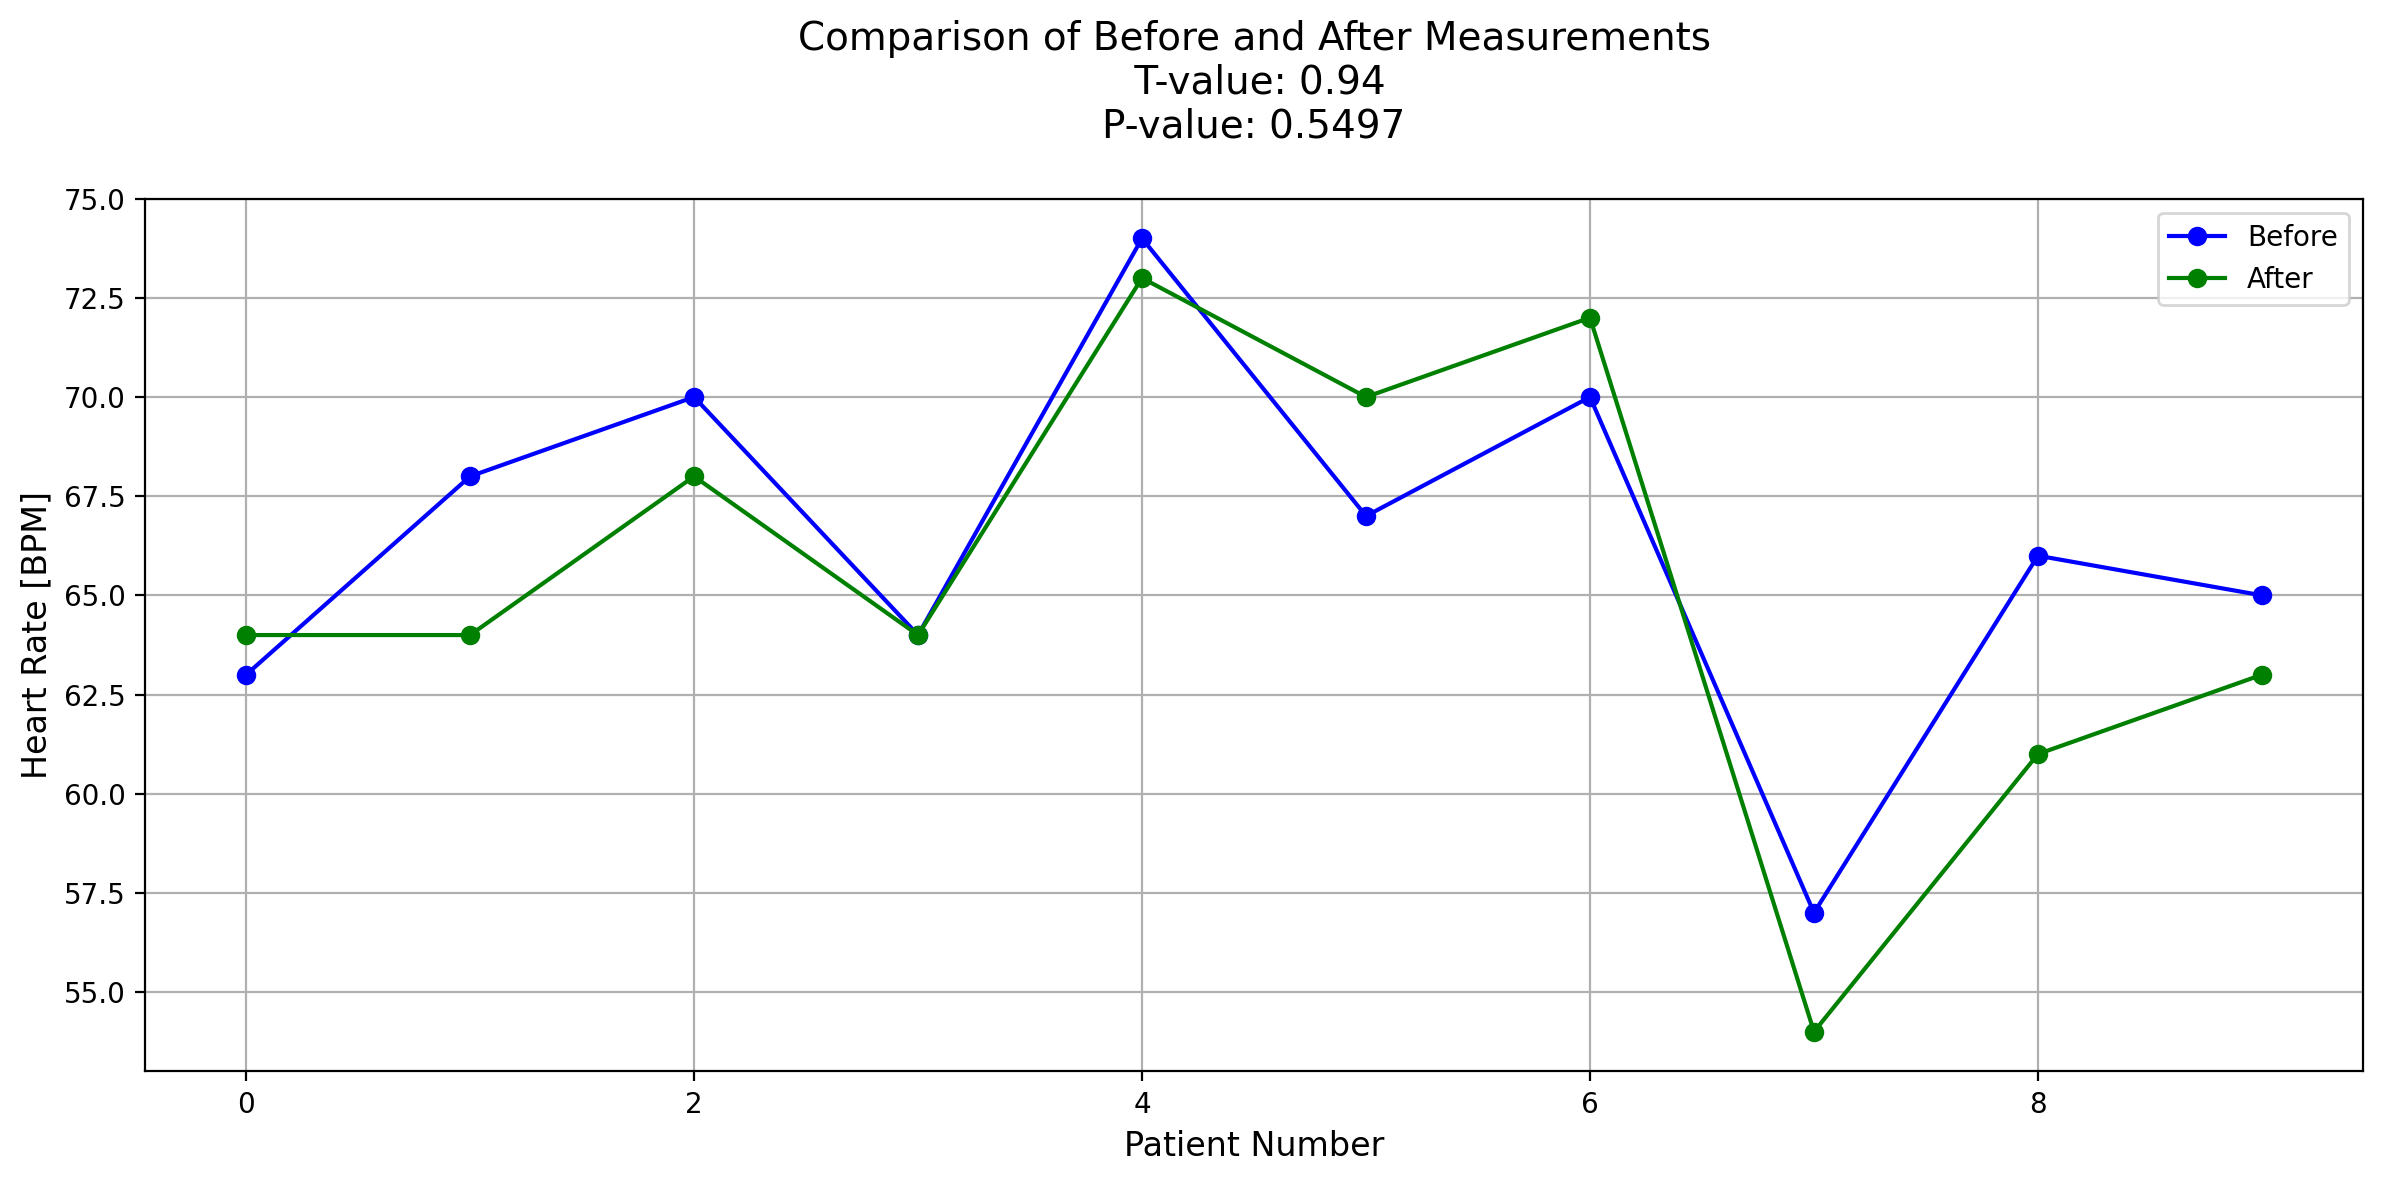

In [279]:
# Create a new plot for before vs. after measurements
plt.figure(figsize=(12, 6))

# Plot the 'before' and 'after' data
plt.plot(data["Before"], label="Before", marker="o", color="blue")
plt.plot(data["After"], label="After", marker="o", color="green")

# Title and axis labels
plt.title(f"Comparison of Before and After Measurements\n T-value: {shapiro_test.statistic:.2f}\nP-value: {shapiro_test.pvalue:.4f}\n", fontsize=14)
plt.xlabel("Patient Number", fontsize=12)
plt.ylabel("Heart Rate [BPM]", fontsize=12)

# Add legend
plt.legend(fontsize=10)
plt.grid(True)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

<span style="color:green">  

***
End of task 3

***

</span>

<span style="color:lightblue">  

### Task 4: ANOVA
***



In this test we will estimate the probability of committing a type II error in specific circumstances.
To begin, create a variable called `no_type_ii` and set it to `0`.

Now use a loop to perform the following test 10,000 times.

1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 

2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.

Summarize and explain your results.

</span>

***

In [280]:
no_type_ii = 0


# generate 100,000 x values from 0 to 20 
x_values = np.linspace(0, 20, 100000)
# using numpy.random.normal function generate normal distribution 
y_values_norm1 = np.random.normal(4.9, 0.1, 100)
y_values_norm2 = np.random.normal(5.0, 0.1, 100)
y_values_norm3 = np.random.normal(5.1, 0.1, 100)



# scipy.stats part of the SciPy library does a nice job of generating the probability density function for us. 
y_values_pdf = norm.pdf(x_values, mean, std)



<span style="color:green">  

***
End of task 4 - Complete 

***

</span>

# 